In [1]:
!date

Wed Dec  8 16:03:37 PST 2021


# Expression of innate immunity marker genes in Torok CTRL data
#### Unfiltered data obtained from using kb with multimapping function. Ref genome includes WRE.

___

In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext blackcellmagic

In [2]:
import sys
import anndata
import scvi

import scanpy as sc
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import pandas as pd

sc.set_figure_params(figsize=(6, 6), frameon=False)
sc.settings.n_jobs=2

In [3]:
# set random seed
np.random.seed(926)

In [4]:
def nd(arr):
    """
    Funciton to transform numpy matrix to nd array.
    """
    return np.asarray(arr).reshape(-1)

___

# Load clustered CTRL data

In [5]:
adata = anndata.read('../../finchseq_data/ctrl_celltype.h5ad')
adata

AnnData object with n_obs × n_vars = 15810 × 22151
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden', 'celltype', 'connectivity'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'celltype_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'connectivities', 'distances'

___

In [19]:
im_markers = [
    "ADAR_ENSTGUG00000004105.2",
    "OASL_ENSTGUG00000006574.2",
    "APOBEC2_ENSTGUG00000018533.2",
    "SAMHD1_ENSTGUG00000003280.2",
]

Not found: IFN I, II, and III; PKR (protein kinase R); RNASEL; TRIM5

In [20]:
# adata.var[adata.var.index.str.startswith("RNASEL")]

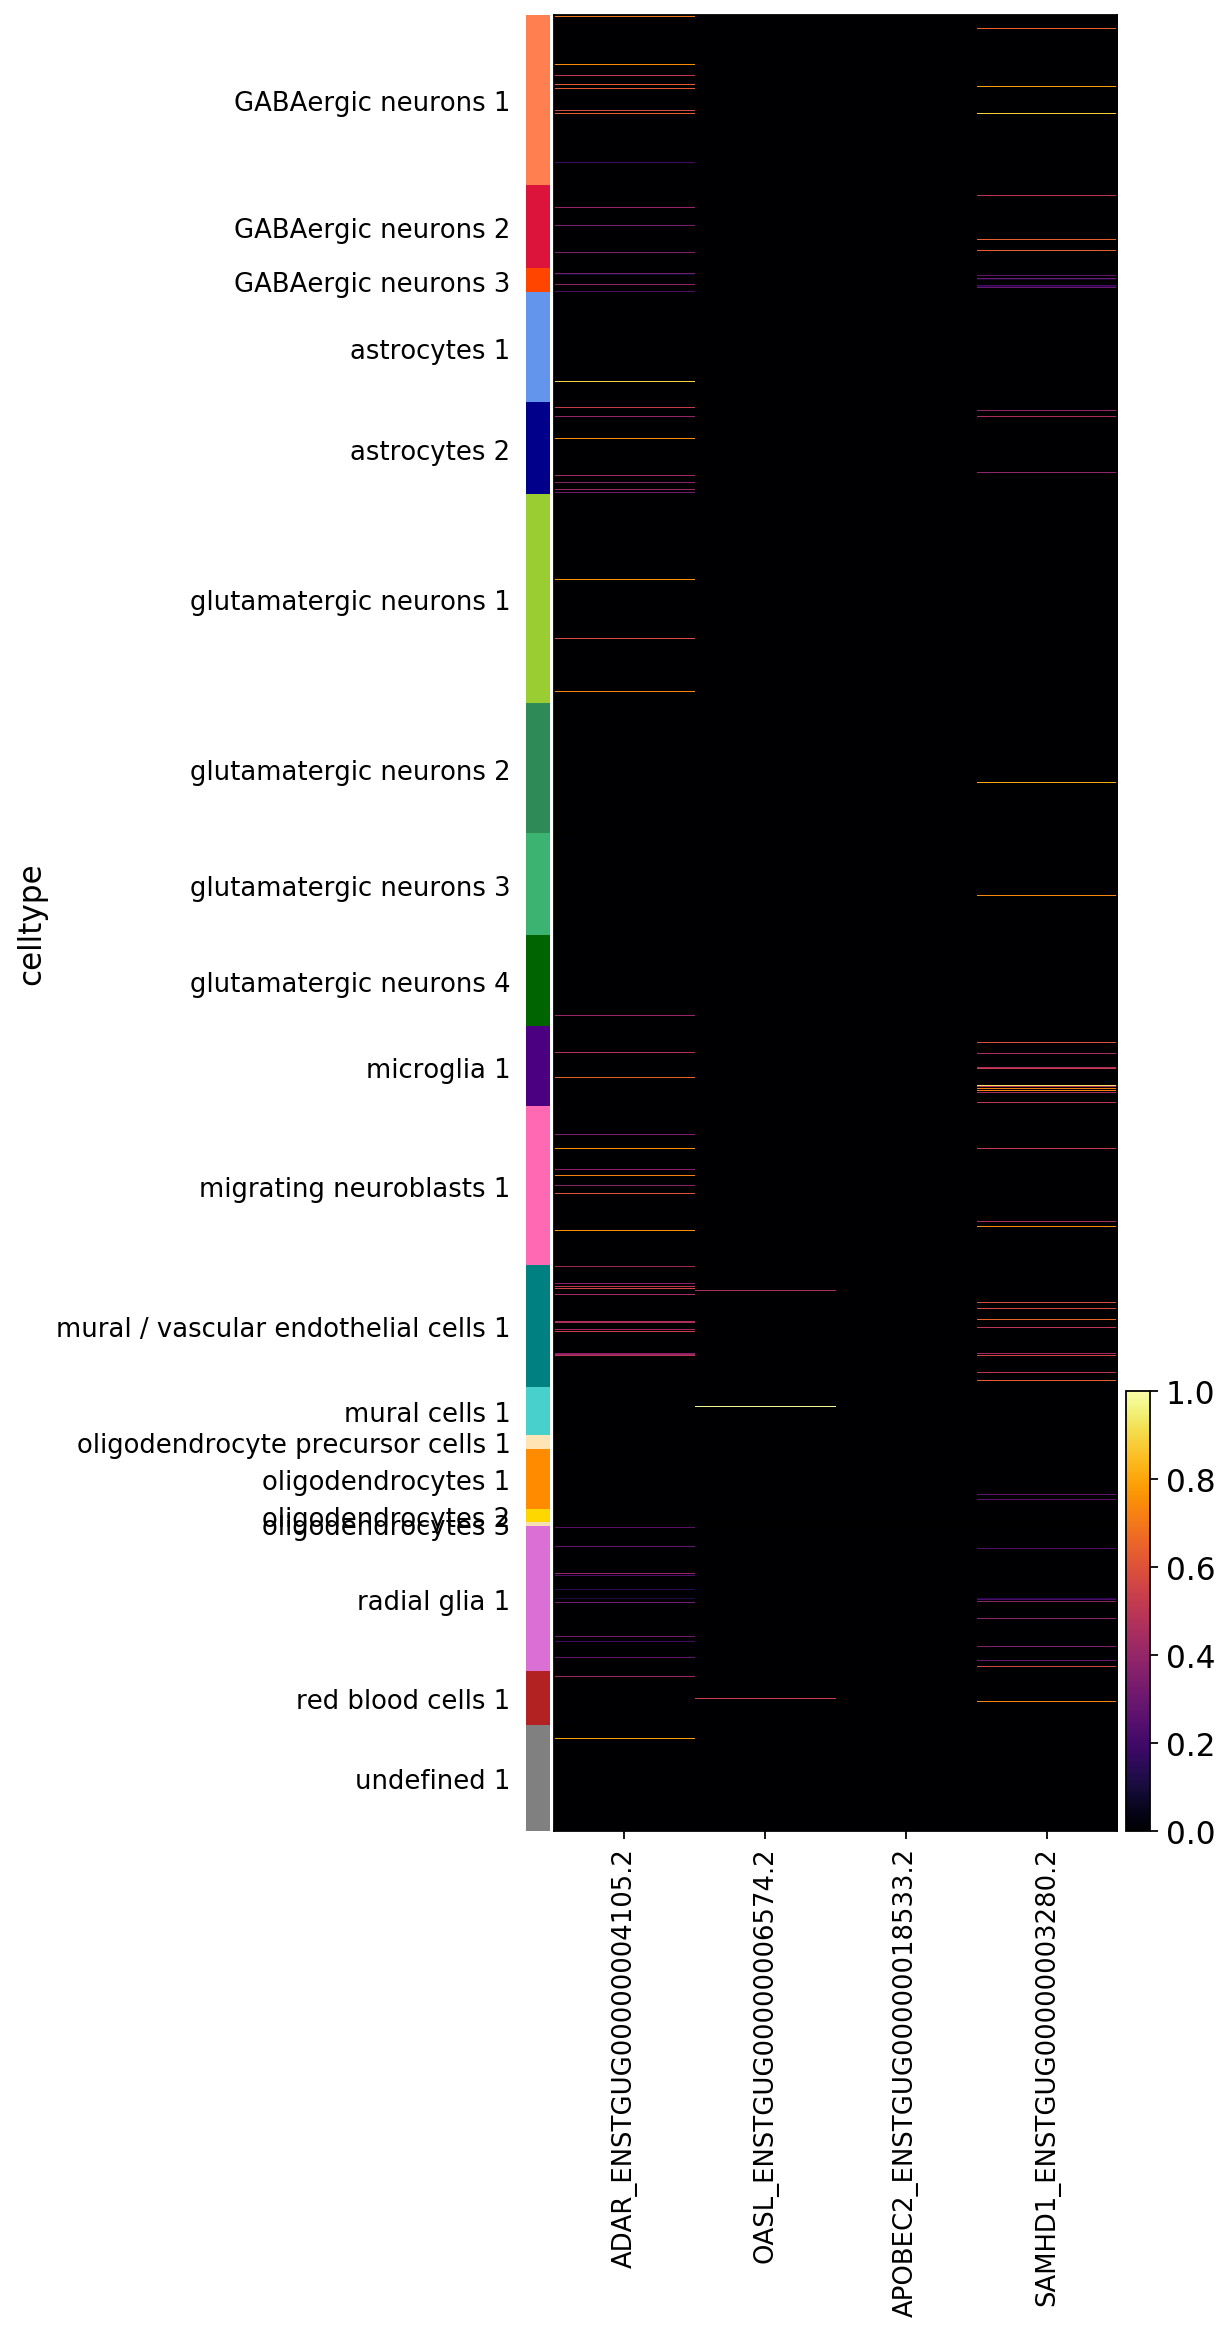

In [24]:
sc.pl.heatmap(
    adata,
    im_markers,
    groupby="celltype",
#     dendrogram=True, # This messes up the ordering of the celltypes
    show_gene_labels=True,
#     var_group_positions=var_groups,
#     var_group_labels=var_labels,
#     var_group_rotation=45,
    use_raw=False, # By default adata.raw.X is plotted. If use_raw=False is set, then adata.X is plotted. 
    cmap="inferno", # Alternative cmap: magma
    standard_scale="var", # standardize that dimension between 0 and 1, meaning for each variable or observation, subtract the minimum and divide each by its maximum
    swap_axes=False,
    figsize=(5, 15),
    save=False
)

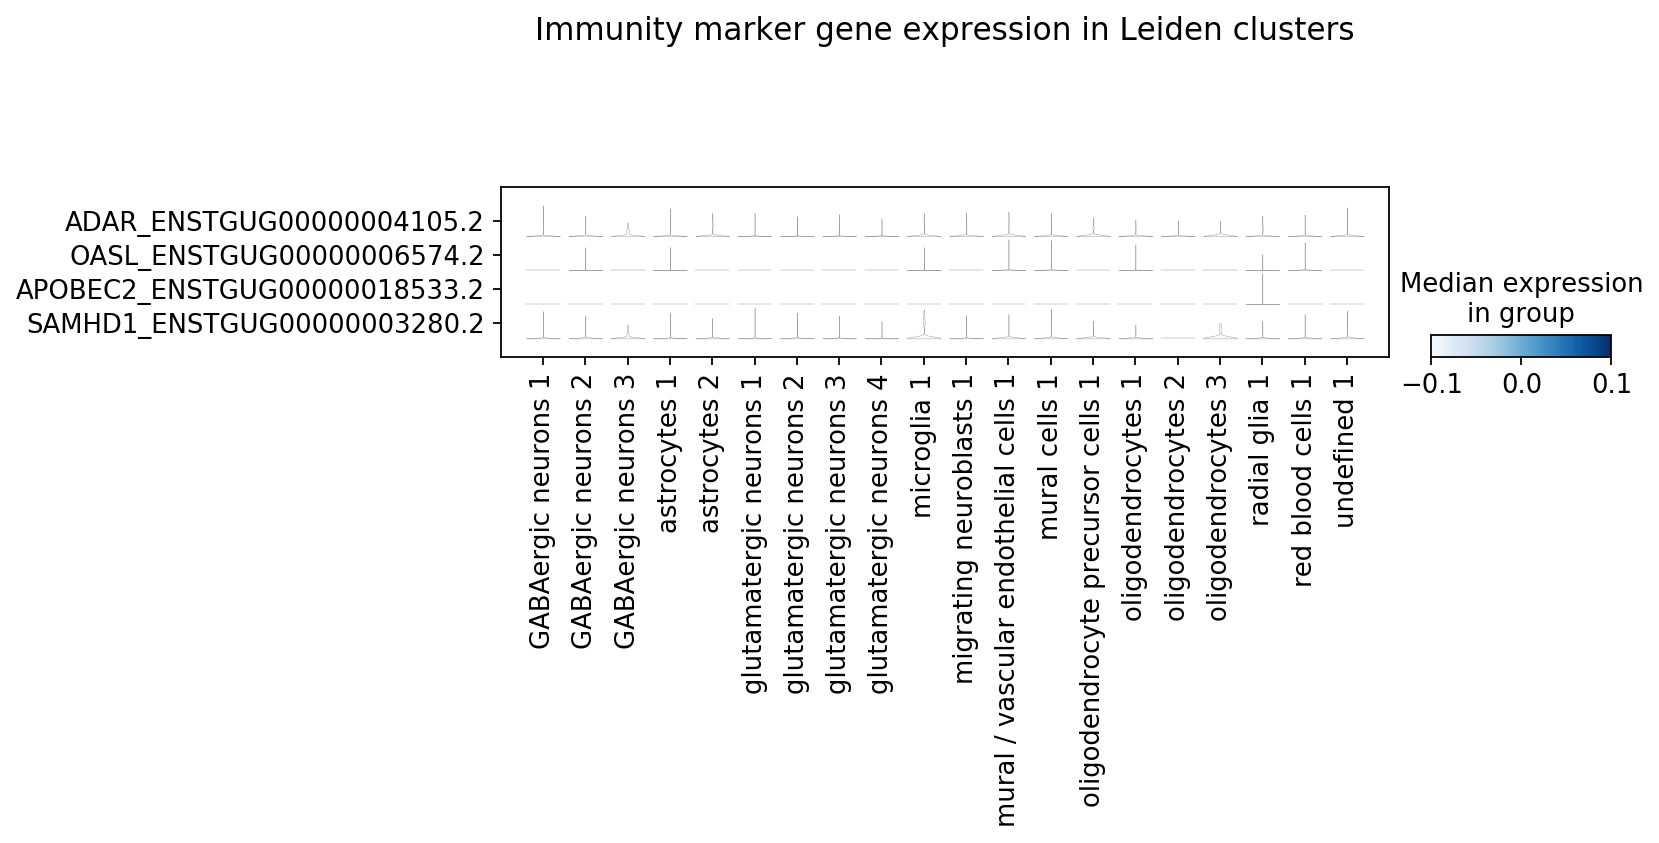

In [25]:
sc.pl.stacked_violin(adata, 
                     im_markers, 
                     groupby='celltype', 
                     title="Immunity marker gene expression in Leiden clusters", 
                     rotation=90, 
                     sharey=True,
                     use_raw=False,
                     swap_axes=True
                    )

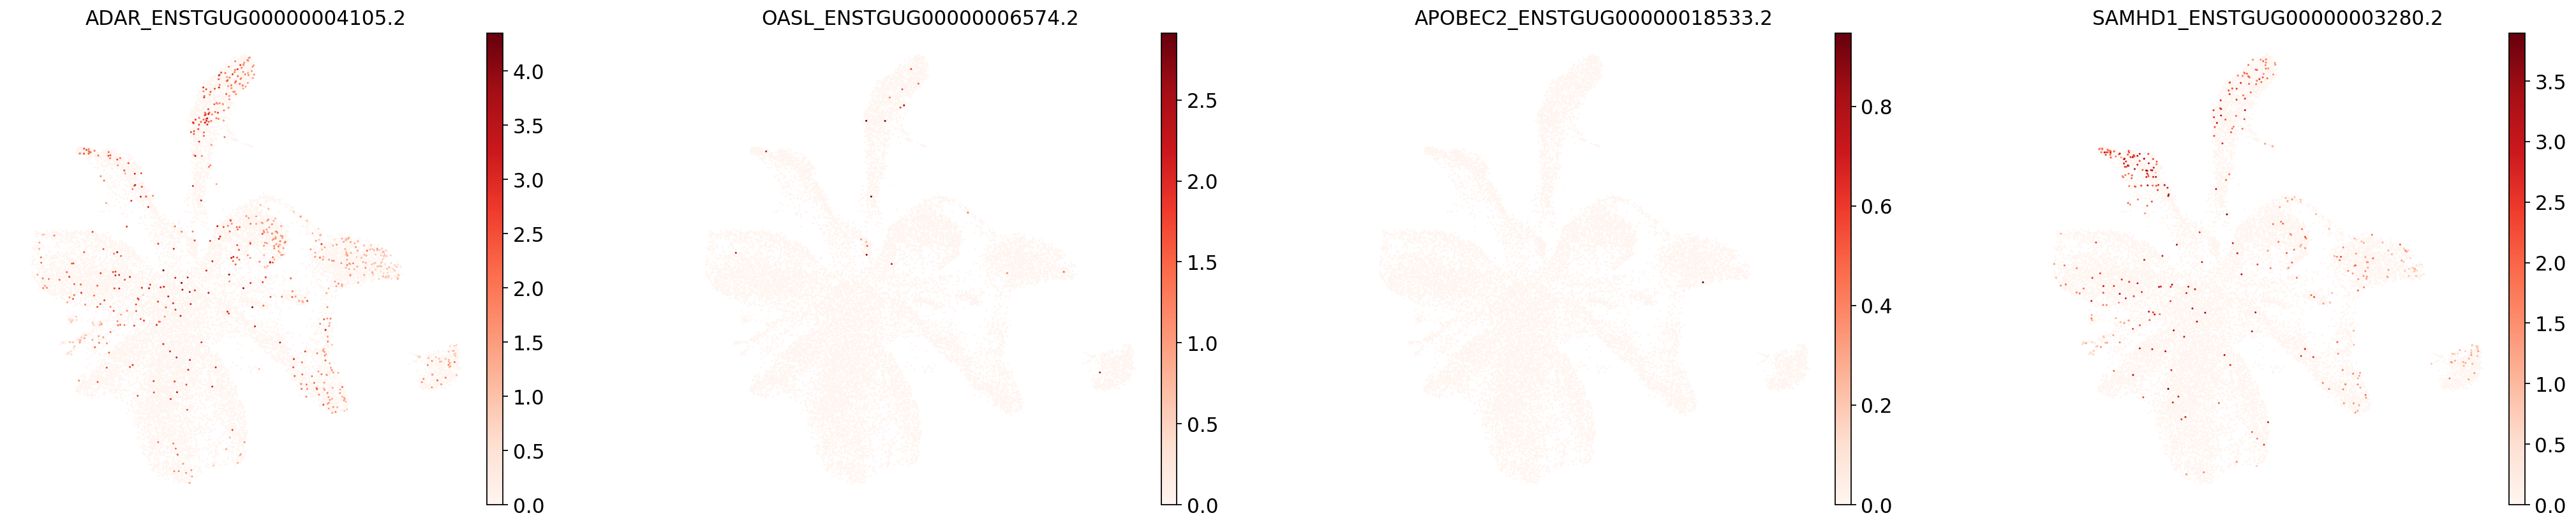

In [35]:
# Plot UMAP and color by Leiden clusters and batch
sc.pl.umap(adata, 
           color=im_markers,
           cmap="Reds",
           wspace=0.3,
#            use_raw=True
          )